<a href="https://colab.research.google.com/github/Maryam-Afshari/thesis/blob/master/Cross_correlations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.tsa.stattools as stattools
#from pyparsing import results
import scipy.signal as ss

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [39]:
# reading the data
df_b = pd.read_csv('/content/drive/MyDrive/Thesis-Afshari/data/basel.csv',index_col=0)
df_b.head()


,datetime,et,p,t,obs
0,1981-01-01,0.000405,0.003536,-0.250816,670.0
1,1981-01-02,0.000472,0.003379,2.172385,647.0
2,1981-01-03,0.000576,0.017352,5.165919,727.0
3,1981-01-04,0.000443,0.022734,1.019687,1363.0
4,1981-01-05,0.000364,0.005195,-2.055391,1202.0


In [40]:
# defining a function to calculate the correlation 
# https://stackoverflow.com/questions/53959879/how-do-i-get-rs-ccf-in-python

def ccf(x, y, lag_max = 100):
    result = ss.correlate(y - np.mean(y), x - np.mean(x), method='direct') / (np.std(y) * np.std(x) * len(y))
    length = (len(result) - 1) // 2
    lo = length - lag_max
    hi = length + (lag_max + 1)
    return result[lo:hi]

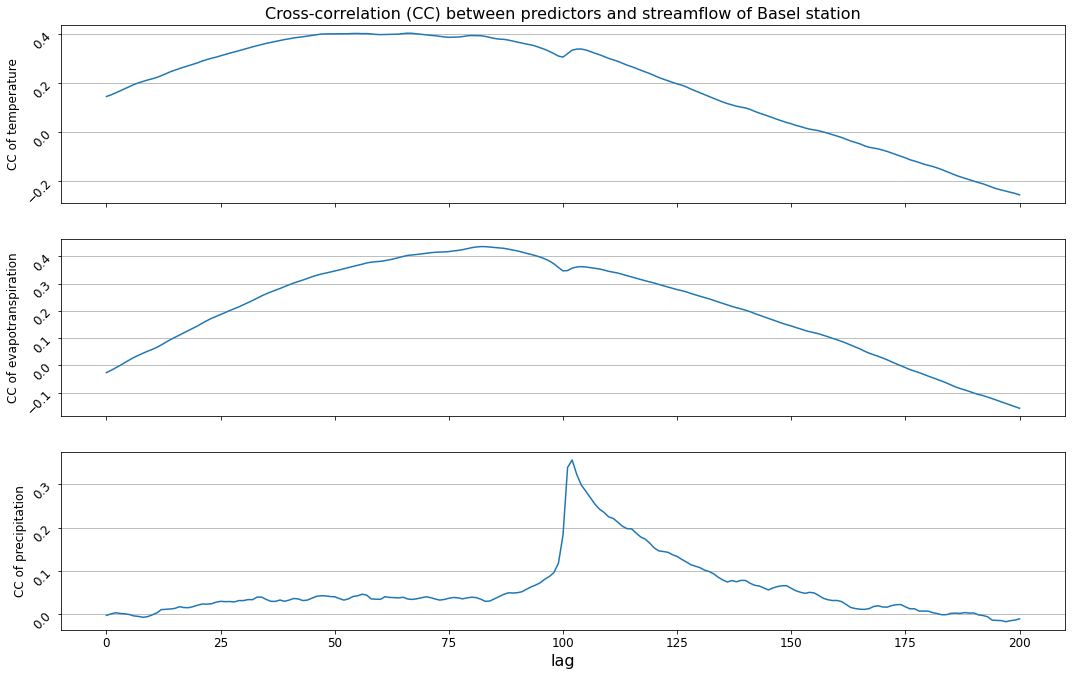

In [45]:
# ploting cross-correlation between predictors and streamflow of Basel station

# variables 
x_t = df_b.t
x_et = df_b.et
x_p = df_b.p
y = df_b.obs

# ploting
fig, (ax1, ax2, ax3) = plt.subplots(3, sharex=True, figsize=(18, 18*2/(1+5**0.5)))

ax1.plot(ccf(x_t, y, lag_max=100))
ax2.plot(ccf(x_et, y, lag_max=100))
ax3.plot(ccf(x_p, y, lag_max=100))

ax1.title.set_text('Cross-correlation (CC) between predictors and streamflow of Basel station')
ax1.set_ylabel('CC of temperature', fontsize = 12)
ax2.set_ylabel('CC of evapotranspiration', fontsize = 12)
ax3.set_ylabel('CC of precipitation', fontsize = 12)
ax3.set_xlabel('lag', fontsize = 16)
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['axes.labelsize'] = 16

for ax in (ax1, ax2, ax3):
  ax.grid(axis = 'y')
  ax.tick_params(axis='y', labelsize=12,  rotation = 45)
  ax.tick_params(axis='x', labelsize=12)
  

plt.savefig("/content/drive/MyDrive/Thesis-Afshari/figures/CCF_Basel.png")

# Lobith Station 

In [46]:
# reading the data
df_l = pd.read_csv('/content/drive/MyDrive/Thesis-Afshari/data/lobith.csv',index_col=0)
df_l.head()

,datetime,et,p,t,obs
0,1981-01-01,0.000253,0.002365,1.626031,2622
1,1981-01-02,0.000301,0.008901,4.593596,2496
2,1981-01-03,0.000337,0.013729,5.860163,2485
3,1981-01-04,0.000259,0.007747,1.552292,2835
4,1981-01-05,0.000227,0.003110,-0.247810,3443


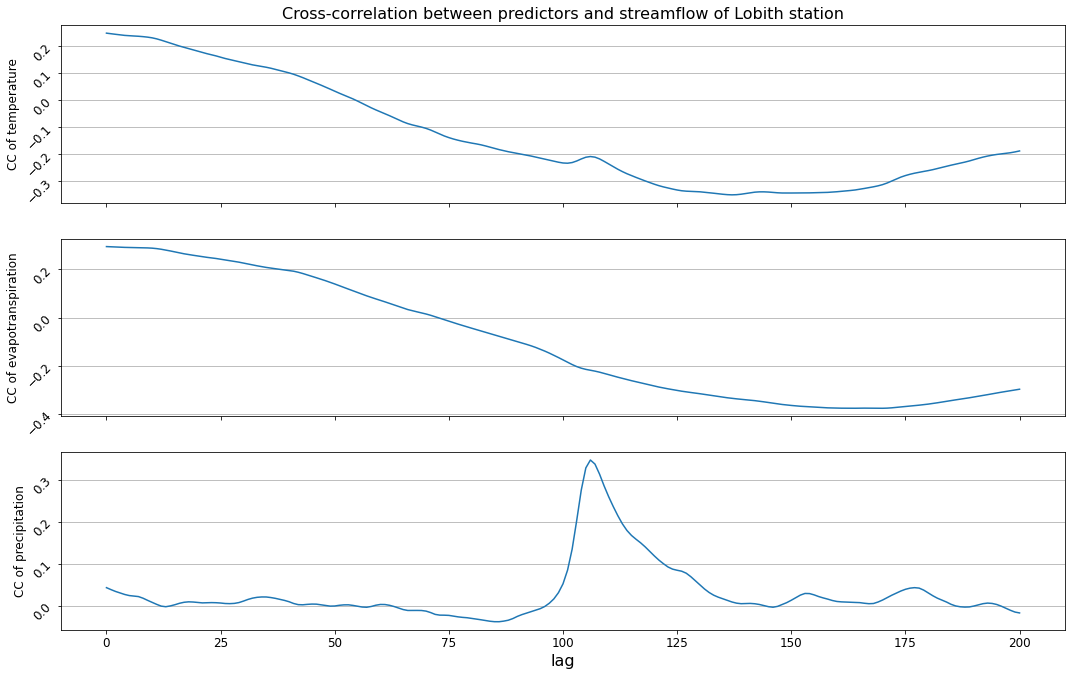

In [48]:
# ploting cross-correlation between predictors and streamflow of Basel station

# variables
x_t_ = df_l.t
x_et_ = df_l.et
x_p_ = df_l.p
y_l = df_l.obs

# plotting
fig, (ax1, ax2, ax3) = plt.subplots(3, sharex=True, figsize=(18, 18*2/(1+5**0.5)))

ax1.plot(ccf(x_t_, y_l, lag_max=100))
ax2.plot(ccf(x_et_, y_l, lag_max=100))
ax3.plot(ccf(x_p_, y_l, lag_max=100))

ax1.title.set_text('Cross-correlation between predictors and streamflow of Lobith station')
ax1.set_ylabel('CC of temperature', fontsize = 12)
ax2.set_ylabel('CC of evapotranspiration', fontsize = 12)
ax3.set_ylabel('CC of precipitation', fontsize = 12)
ax3.set_xlabel('lag', fontsize = 16)
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['axes.labelsize'] = 16

for ax in (ax1, ax2, ax3):
  ax.grid(axis = 'y')
  ax.tick_params(axis='y', labelsize=12,  rotation = 45)
  ax.tick_params(axis='x', labelsize=12)
  #ax.set_ylabel("CCF")
  

plt.savefig("/content/drive/MyDrive/Thesis-Afshari/figures/CCF_Lobith.png")